## STUDENT PERFORMANCE INDICATOR

### Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks To Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

### 1) Problem Statement

- This project understand how the student's performance (test scores) is affected by the other variables such as Gender, Ethenicity, Parental Level of Education, Lunch and Test Preparation Course.

### 2) Data collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# %matplotlib inline is a magic command in Jupyter Notebook that allows 
# plots generated by matplotlib to be displayed directly within the notebook
# , rather than in a separate window or external file. 
# When you use %matplotlib inline, the output of plotting commands 
# is displayed inline in the notebook output cell immediately below the 
# code cell that generated it.

### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('stud.csv')

###  Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information


- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A,B,C,D,E)
- parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to Perform

- Check Missing Values
- Check Duplicates
- Check DataTypes
- Check the number of unique of each column
- Check statistics of data set
- Check Various Categories present in the different categorical column

### 3.1 Check Missing Values

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

### There are no duplicates values in the data set.

### 3.3 Check Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### To see which are unique values in each column using function

In [9]:
def unique_values(dataframe):
    for i in dataframe.columns:
        print(f"For column '{i}' unique values are following: ")
        print(dataframe[i].unique())
        print()

In [10]:
unique_values(df)

For column 'gender' unique values are following: 
['female' 'male']

For column 'race_ethnicity' unique values are following: 
['group B' 'group C' 'group A' 'group D' 'group E']

For column 'parental_level_of_education' unique values are following: 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

For column 'lunch' unique values are following: 
['standard' 'free/reduced']

For column 'test_preparation_course' unique values are following: 
['none' 'completed']

For column 'math_score' unique values are following: 
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]

For column 'reading_score' unique values are following: 
[ 72  90  95  57  78  83  43 

### Not observed any unwanted characters.

### 3.5 Check Statistics of Dataset

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

- From above description of numerical data, all means are very close to each other - between 66 and 68.5;
- All Standard Deviations are also - between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading =17

### 3.7 Exploring Data

#### define numerical & categorical columns

In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [13]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [14]:
# print columns

print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} numerical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [15]:
df['total_score'] = sum([df['math_score'],df['reading_score'],df['writing_score']])
df['average'] = df['total_score']/len(numeric_features)

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score']==100].shape[0]
writing_full = df[df['writing_score']==100].shape[0]
math_full = df[df['math_score']==100].shape[0]

print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Math: {math_full}")

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [18]:
 df[df['writing_score']==100]['total_score'].shape[0]

14

In [19]:
reading_less_20 = df[df['reading_score'] <=20 ].shape[0]
writing_less_20 = df[df['writing_score'] <=20 ].shape[0]
math_less_20 = df[df['math_score'] <=20 ].shape[0]

print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Math: {math_less_20}")


Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Math: 4


### Insights

- From above values we get students have performed the worst in Maths
- Best performance is in reading section.

### 4. Exploring Data (Visualization)


### 4.1 Visualize average score distribution to make some conclusion.


- Histogram
- Kernel Distribution Function (KDE)


### 4.1.1 Histogram and KDE


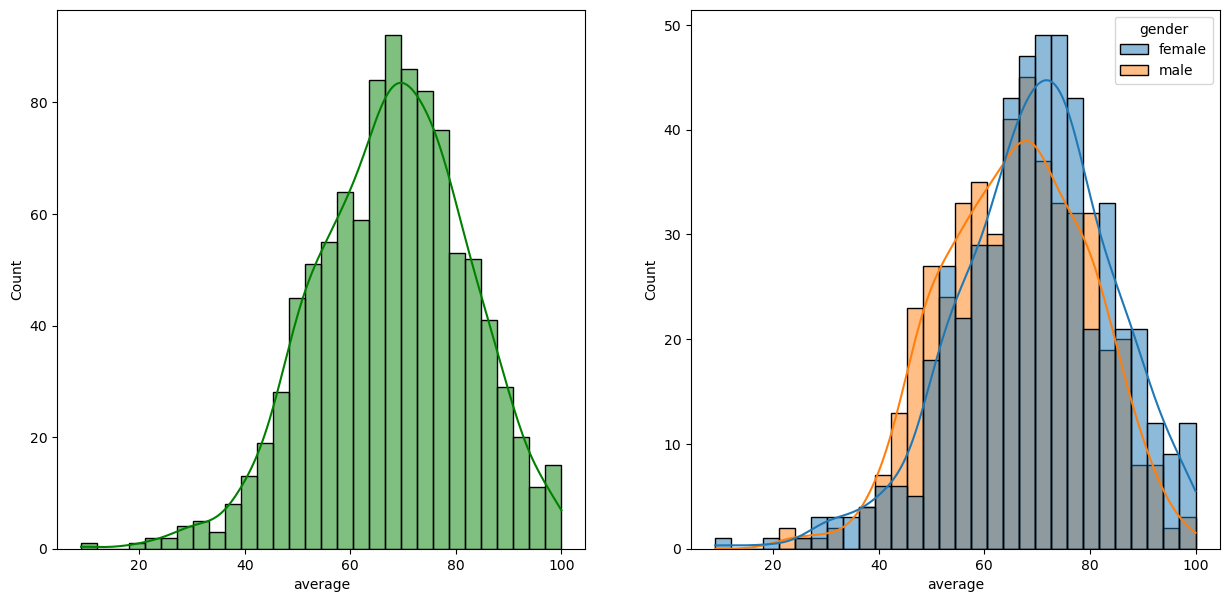

In [20]:
fig, axe = plt.subplots(1,2,figsize = (15,7))

plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', hue = 'gender', bins = 30, kde = True, color='g')
plt.show()

In [21]:
# # Simplier way

# plt.figure(figsize = (15,7))

# plt.subplot(121)
# sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'r')
# plt.subplot(122)
# sns.histplot(data = df, x = 'average',hue = 'gender', bins = 30, kde = True, color = 'g')

# plt.show()

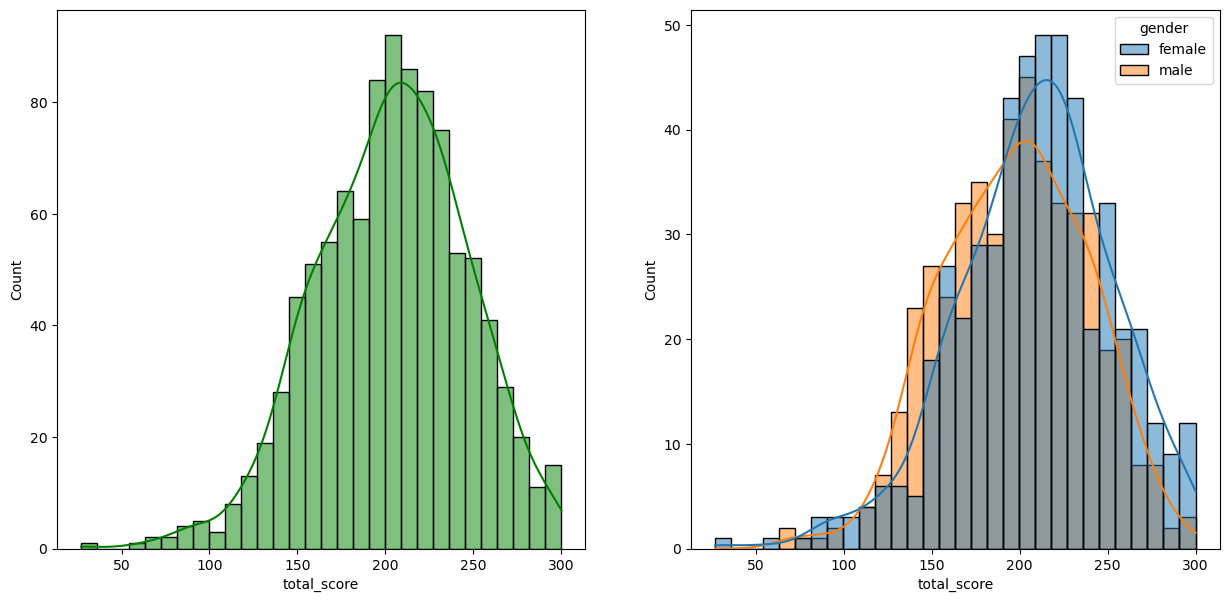

In [22]:
fig, axe = plt.subplots(1,2,figsize = (15,7))

plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', hue = 'gender', bins = 30, kde = True, color='g')
plt.show()

### Insights

- Female students tend to perform well then male students.

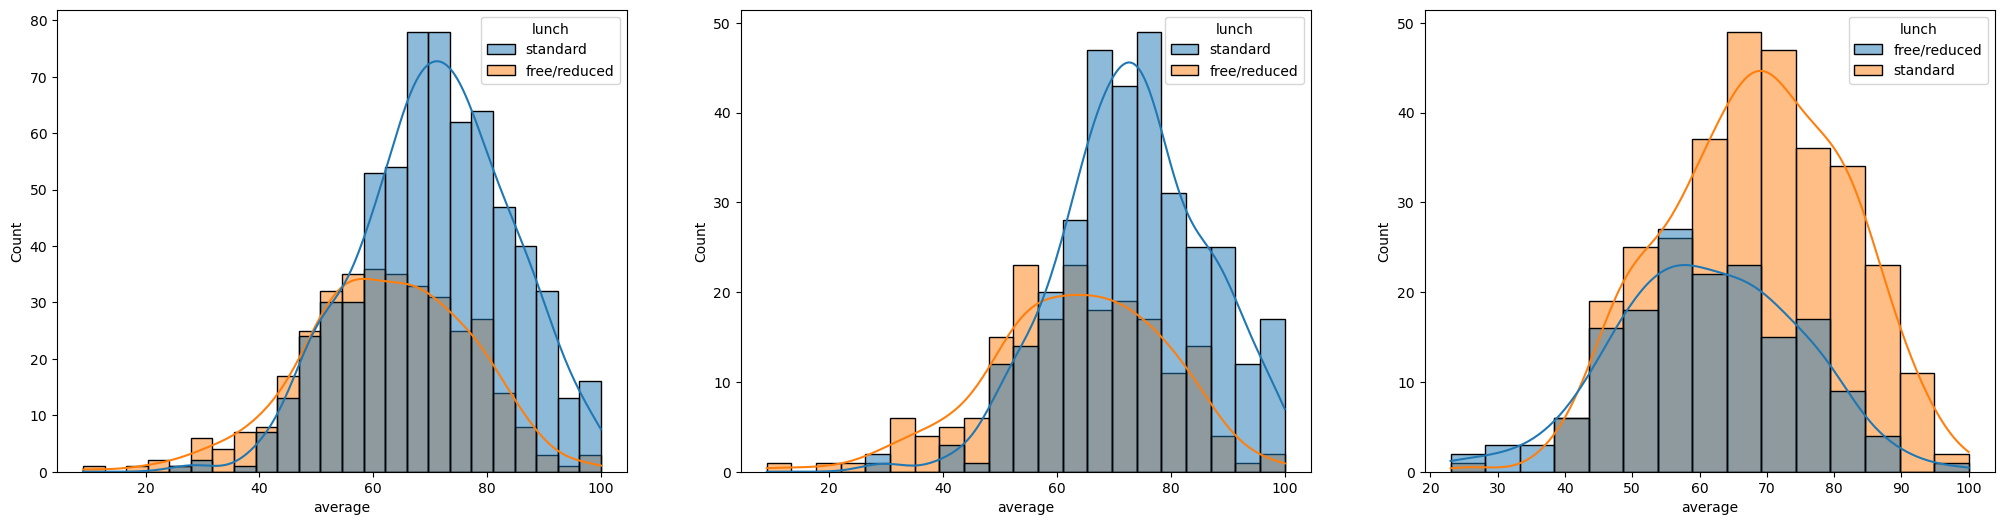

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

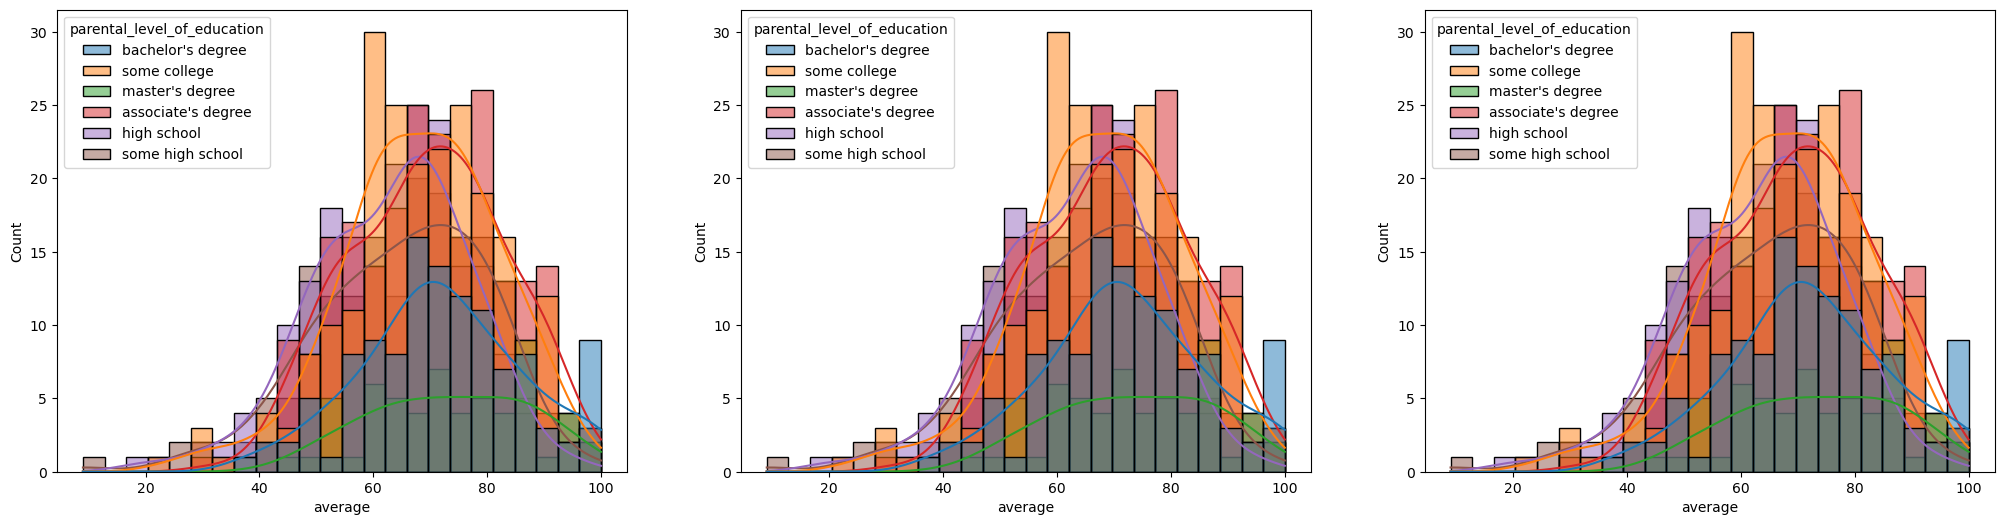

In [24]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = df['average'], hue = df['parental_level_of_education'], kde = True )
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'], x = df['average'], hue = df['parental_level_of_education'], kde = True)
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'], x = df['average'], hue = df['parental_level_of_education'], kde = True)
plt.show()

### Insight

- In general parent's education don't help student perform well in exam.
- The 2nd and 3rd plots show that parents whose education is at the level of some college or an associate's degree tend to have children who perform well in exams.

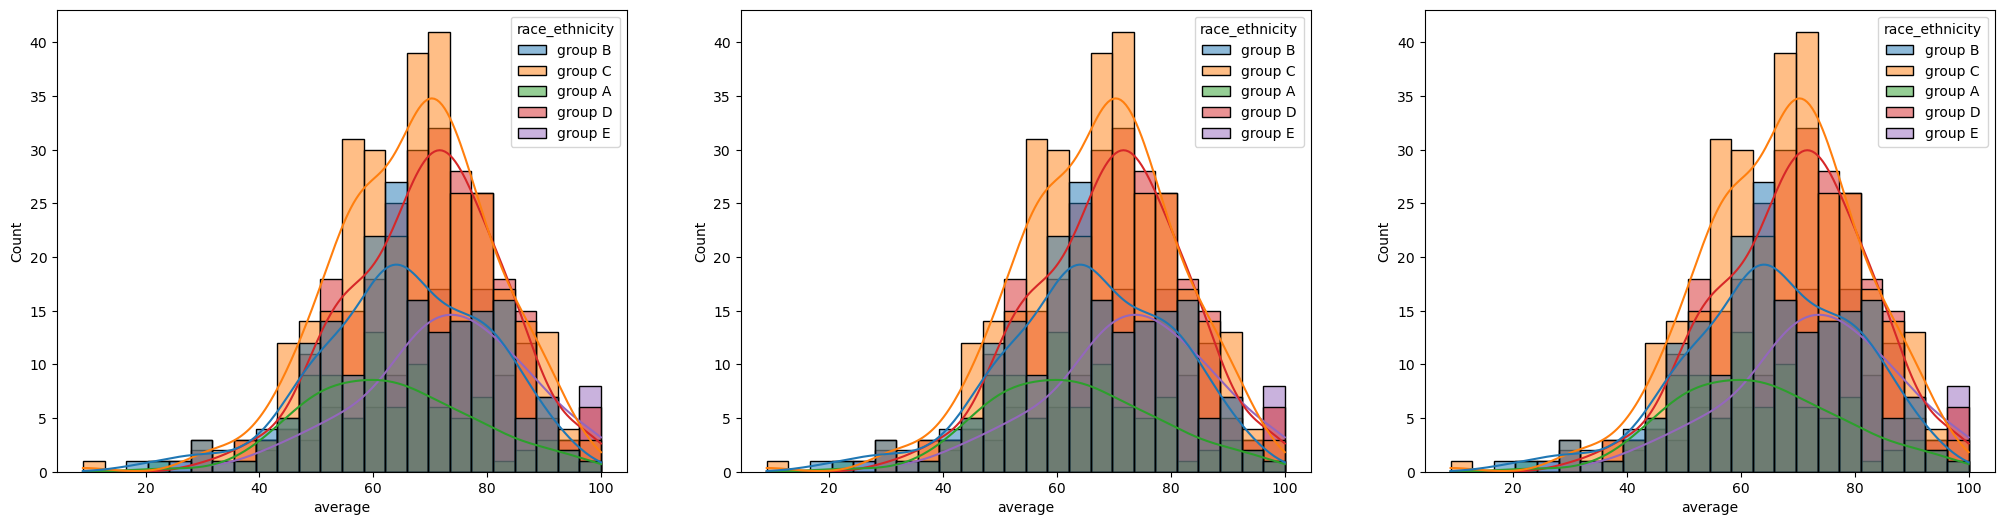

In [25]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = df['average'], hue = df['race_ethnicity'], kde = True)
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'], x = df['average'], hue = df['race_ethnicity'], kde = True)
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'], x = df['average'], hue = df['race_ethnicity'], kde = True)
plt.show()

### Insights:

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.
- Students of group C tends to perform good in exam.

In [26]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

## 4.2 Maximum Score of students in all three subjects

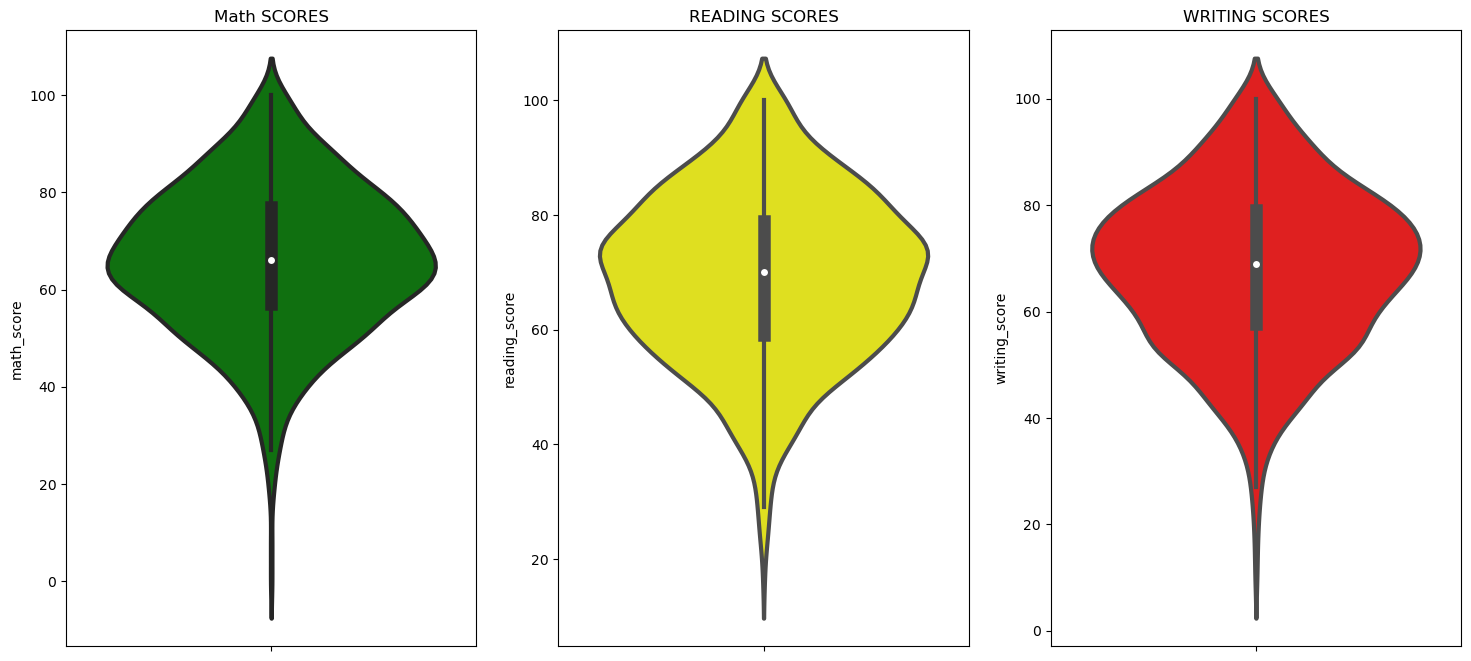

In [27]:
plt.subplots(1,3,figsize = (18,8))
plt.subplot(131)
plt.title('Math SCORES')
sns.violinplot(data = df, y = 'math_score', color = 'green', linewidth = 3)
plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(data = df, y = 'reading_score', color = 'yellow', linewidth = 3)
plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(data = df, y = 'writing_score', color = 'red', linewidth = 3)
plt.show()

### Insights:

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

## 4.3 Multivariate analysis using pieplot

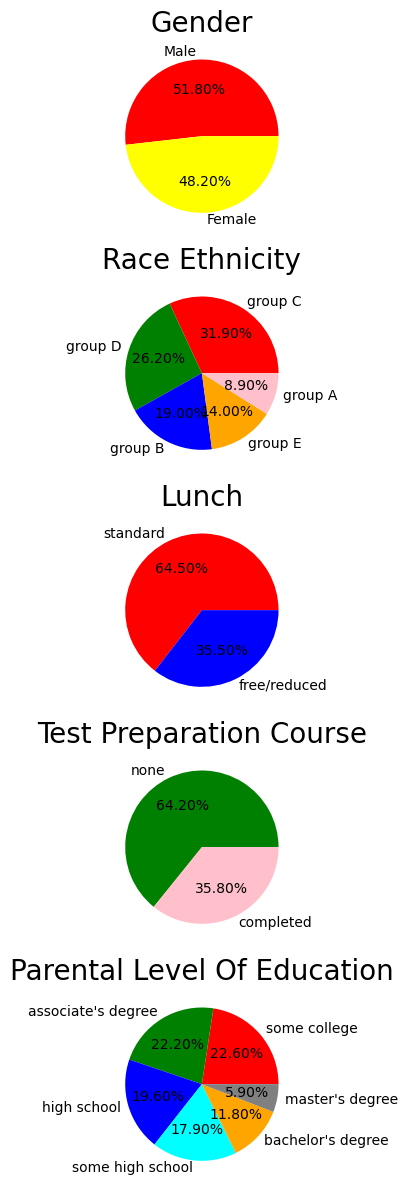

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)


plt.subplot(511)
size = df['gender'].value_counts()
label = ['Male', 'Female']
color = ['Red','yellow']
plt.pie(x = size, labels = label, colors = color, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(512)
size = df['race_ethnicity'].value_counts()
label = ['group C', 'group D', 'group B', 'group E', 'group A']
color = ['red','green','blue','orange','pink']
plt.pie( x = size, labels = label, colors = color, autopct = '%.2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(513)
size = df['lunch'].value_counts()
color = ['red','blue']
label = ['standard', 'free/reduced']
plt.pie(x = size , colors = color, labels = label, autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(514)
size = df['test_preparation_course'].value_counts()
color = ['green', 'pink']
label = ['none', 'completed']
plt.pie(x = size , colors = color, labels = label, autopct = '%.2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(515)
size = df['parental_level_of_education'].value_counts()
color = ['red', 'green', 'blue', 'cyan','orange','grey']
label = ['some college', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"]
plt.pie(x = size , colors = color, labels = label, autopct = '%.2f%%')
plt.title('Parental Level Of Education', fontsize = 20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()

### Insights

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

### 4.4.1 GENDER COLUMN

- How is distribution of Gender?
- Is gender has any impact on students's performance?

### UNIVARIATE ANALYSIS (How is distribution of Gender ? )

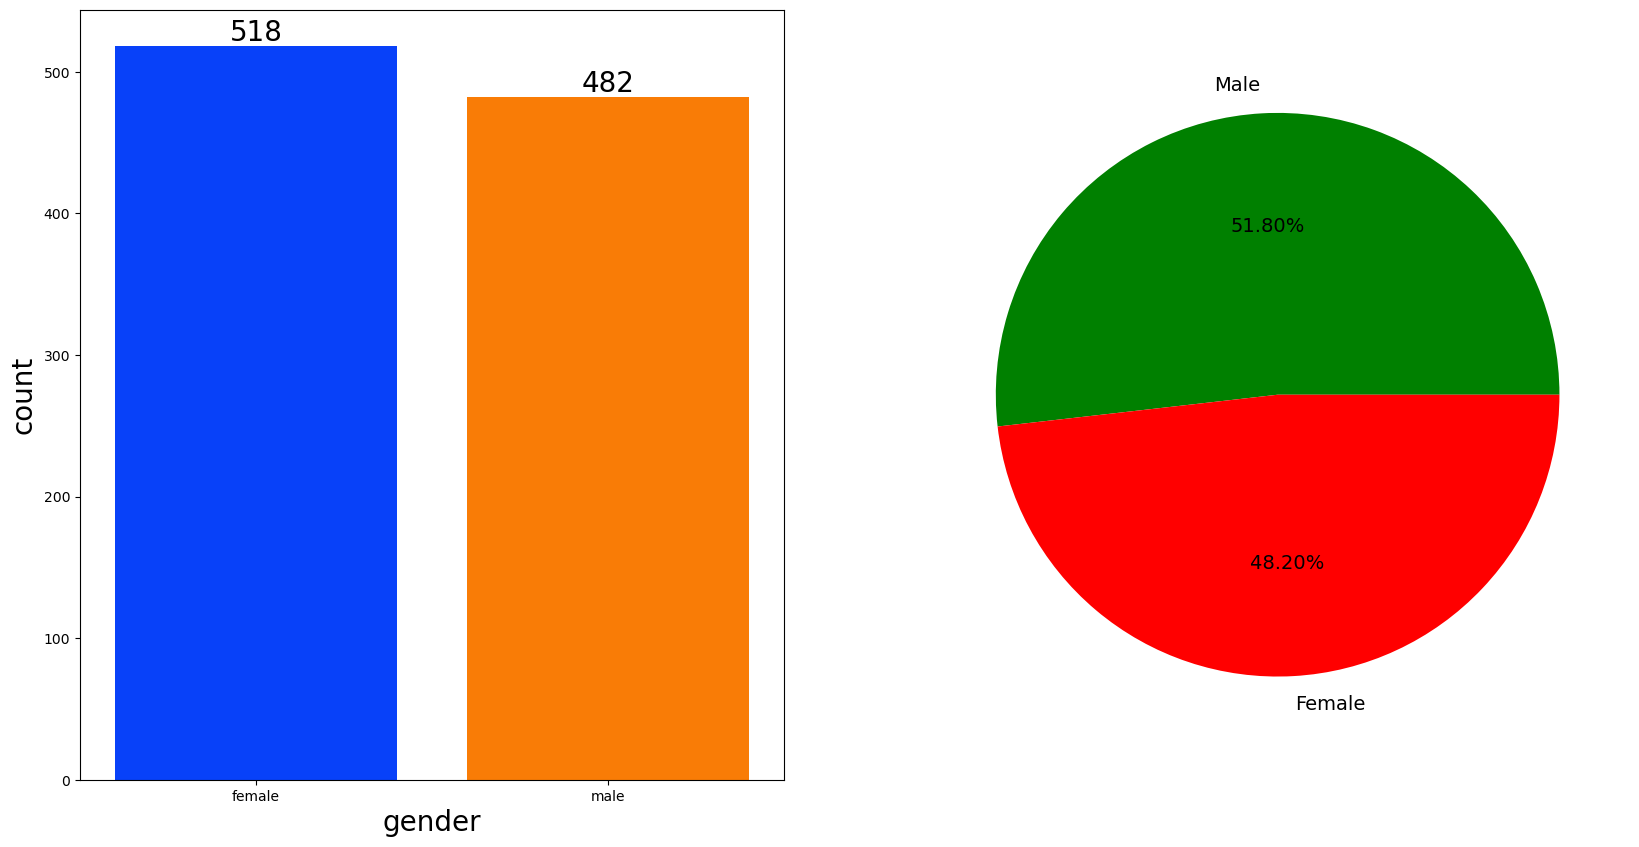

In [29]:
f, ax = plt.subplots(1,2, figsize = (20,10))
plt.subplot(121)
plt.xlabel('gender', fontsize =20)
plt.ylabel('Count', fontsize =20)
sns.countplot( data = df, x = df['gender'], ax = ax[0], palette = 'bright', saturation = 0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    
    
plt.subplot(122)
plt.pie(data = df , x = df['gender'].value_counts(), colors = ['green','red'], autopct = '%1.2f%%', labels = ['Male','Female'],textprops={'fontsize': 14})
plt.show()

### Insights

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [30]:
gender_group = df.set_index('gender').groupby(level=0)[['math_score','reading_score','writing_score','average']].agg('mean')

In [31]:
gender_group

,math_score,reading_score,writing_score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


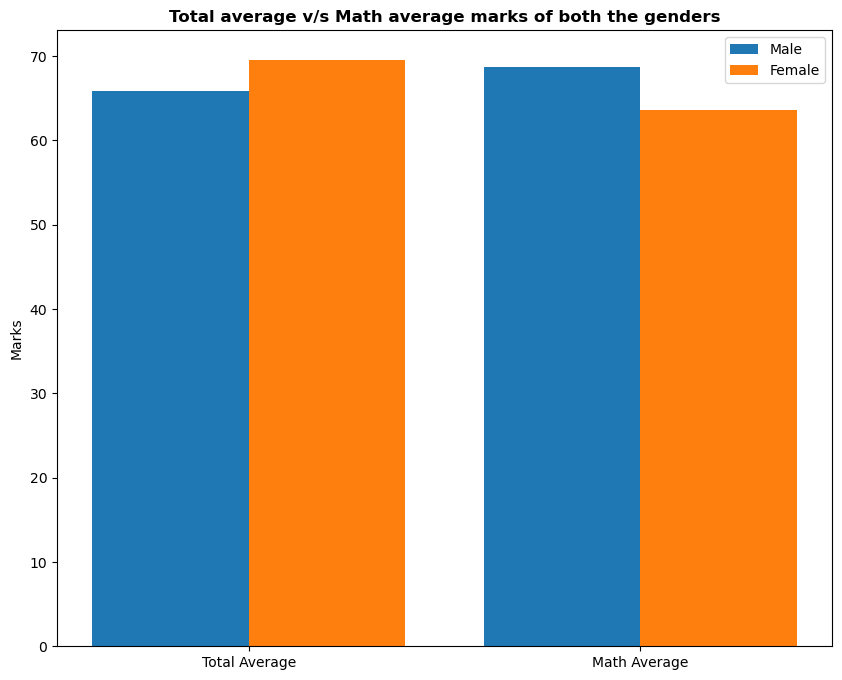

In [32]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights

- On an average females have a better overall score than men.
- Whereas males have scored higher in Maths.

## 4.4.2 RACE/ETHNICITY COLUMN

- How is Group wise distribution?
- Is Race/Ethnicity has any impact on student's performance?

### UNIVARIATE ANALYSIS (How is Group wise distribution?)

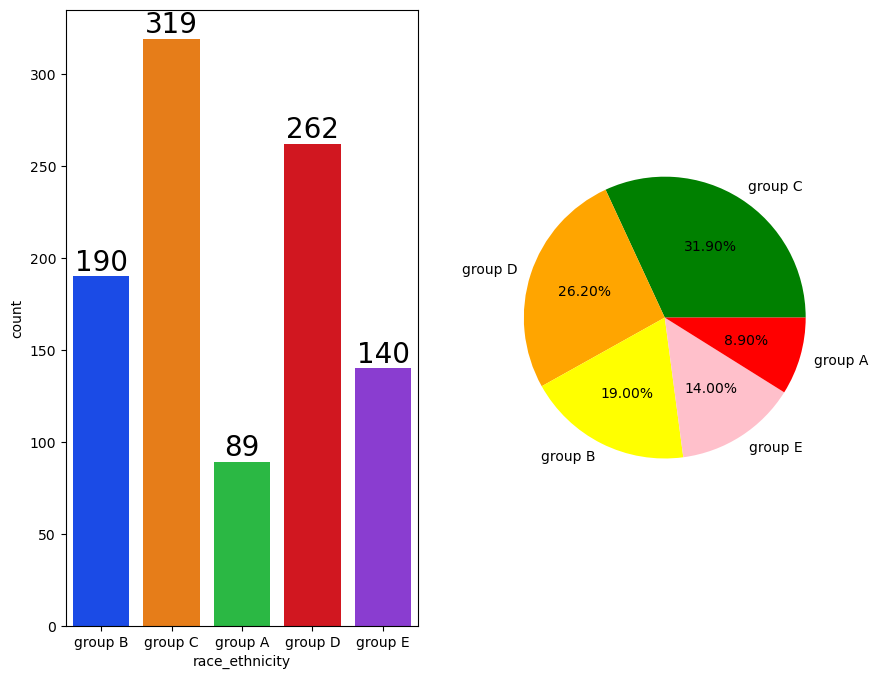

In [33]:
f, ax = plt.subplots(1,2,figsize = (10,8))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'race_ethnicity', palette = 'bright',ax = ax[0], saturation = 0.8)

for container in ax[0].containers:
    ax[0].bar_label(container,size = 20,color = 'black')
    
plt.subplot(1,2,2)
label = ['group C','group D','group B','group E','group A']
color = ['Green','orange','yellow','pink','red']
plt.pie(x = df['race_ethnicity'].value_counts(), labels = label, colors = color, autopct = "%1.2f%%")
plt.show()

### Insights:

- Most of the student belonging are from group C and D.
- Lowest number of students belong to group A.

### BIVARIATE ANALYSIS (Is Race/Ethnicity has any impact on student's performance?)

In [34]:
Group_data2 = df.set_index('race_ethnicity').groupby(level = 0)#[['math_score','reading_score','writing_score']].agg('mean')

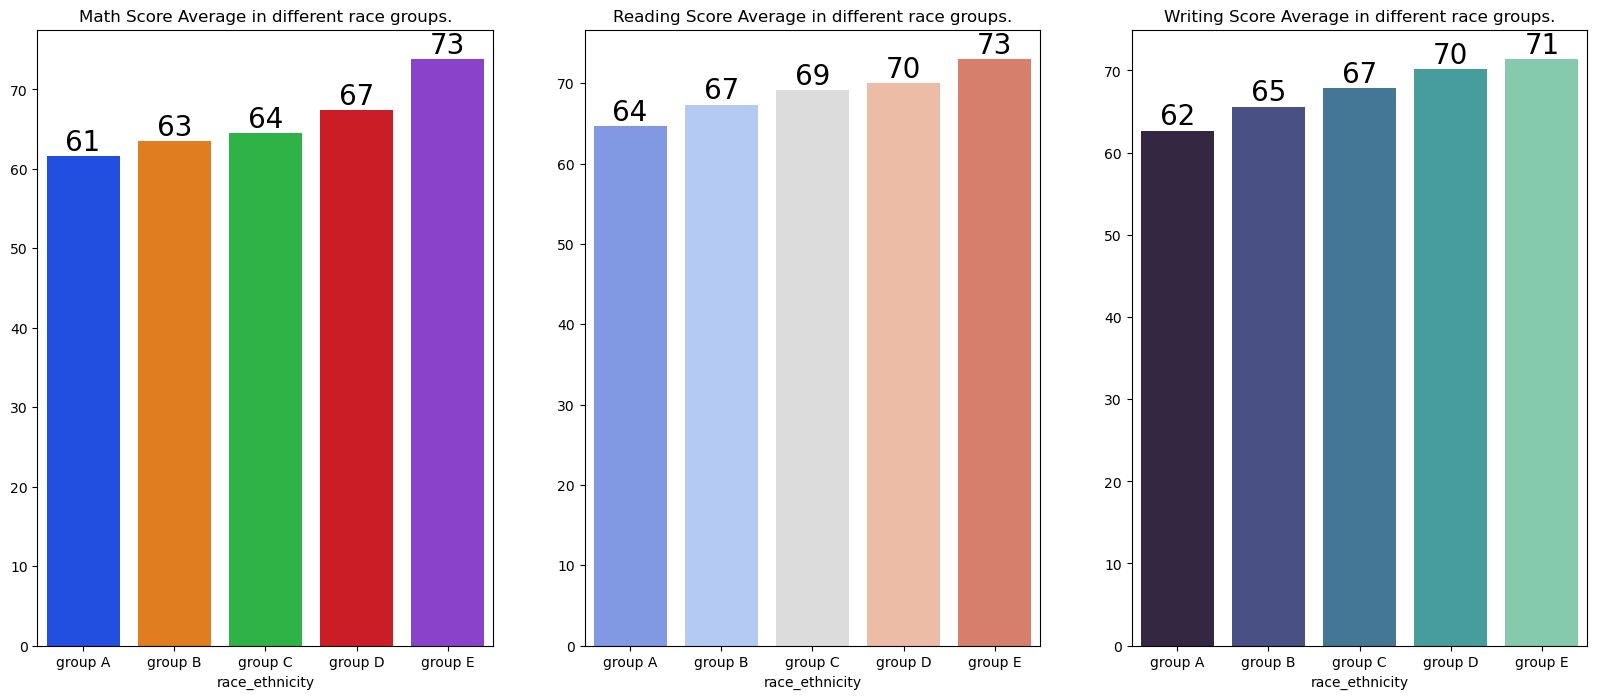

In [35]:
f,ax = plt.subplots(1,3,figsize = (20,8))

plt.subplot(1,3,1)
sns.barplot(x = Group_data2['math_score'].mean().index, y = Group_data2['math_score'].mean().values, palette = 'bright',ax=ax[0])
ax[0].set_title('Math Score Average in different race groups.')

for container in ax[0].containers:
    ax[0].bar_label(container,size = 20,fmt='%d')
    
    
plt.subplot(1,3,2)
sns.barplot( x = Group_data2['reading_score'].mean().index, y = Group_data2['reading_score'].mean().values, palette = 'coolwarm', ax = ax[1])
ax[1].set_title('Reading Score Average in different race groups.')

for container in ax[1].containers:
    ax[1].bar_label(container,size = 20,fmt='%d')
    
    
plt.subplot(1,3,3)
sns.barplot(x = Group_data2['writing_score'].mean().index, y = Group_data2['writing_score'].mean().values, palette = 'mako', ax = ax[2])
ax[2].set_title('Writing Score Average in different race groups.')  

for container in ax[2].containers:
    ax[2].bar_label(container, size = 20, fmt = '%d')
plt.show()

### Insights

- Group E students have scored the highest marks.
- Group A Students have scored the lowest marks.

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

- What is educational background of student's parent?
- Is parental education has any impact on student's performance?

### UNIVARIATE ANALYSIS (What is educational background of student's parent?)

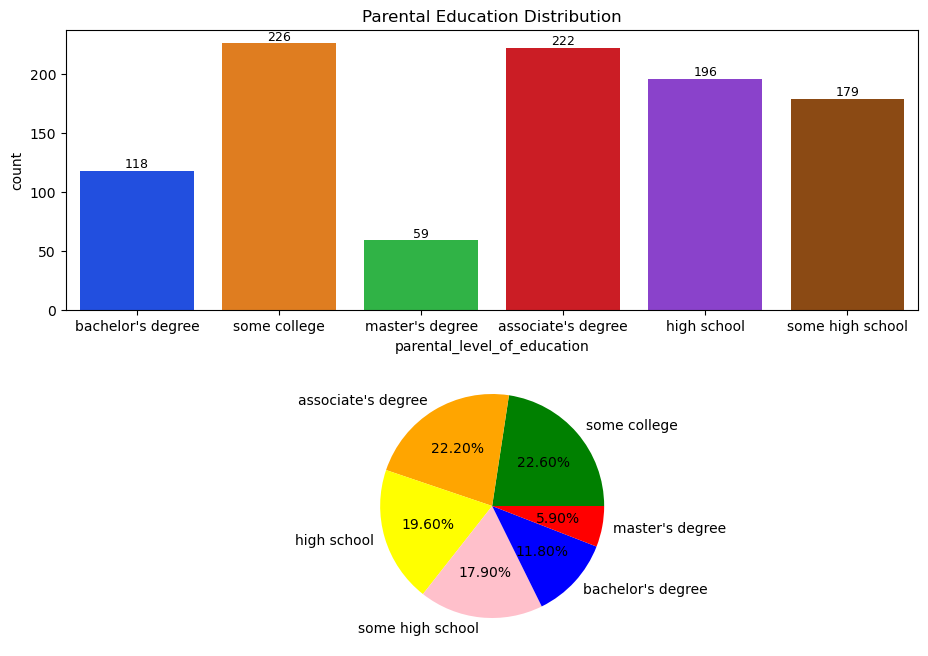

In [36]:
f,ax = plt.subplots(2,1,figsize = (11,8))

plt.subplot(2,1,1)
sns.countplot(data = df, x = 'parental_level_of_education', ax = ax[0], palette = 'bright')
ax[0].set_title('Parental Education Distribution')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 9)
    
plt.subplot(2,1,2)
color = ['Green','orange','yellow','pink','blue','red']
plt.pie(data = df, x = df['parental_level_of_education'].value_counts(), labels = df['parental_level_of_education'].value_counts().index,colors = color, autopct = '%1.2f%%')


plt.show()

### Insights

- Largest number of parents are from some college and having associates degree.

### BIVARIATE ANALYSIS (Is parental education has nay impact on students's performance ?)

In [37]:
Group_data3 = df.set_index('parental_level_of_education').groupby(level=0)

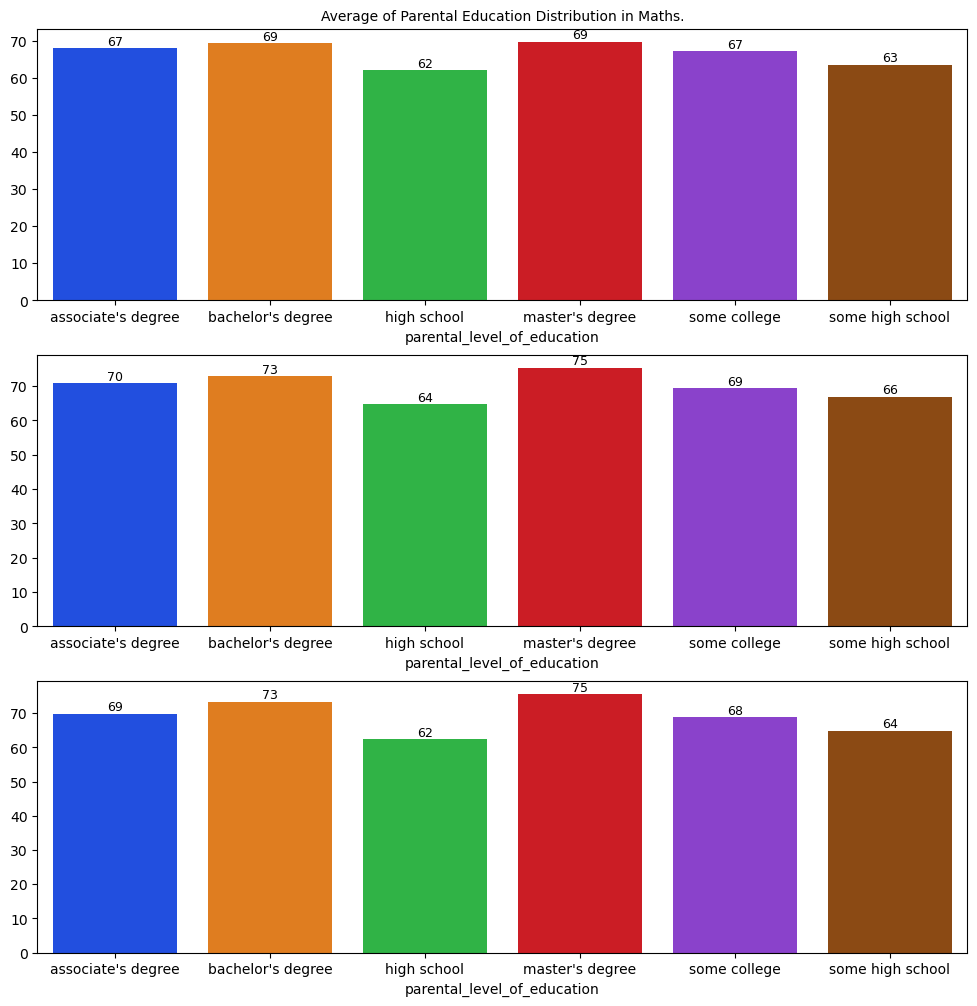

In [38]:
f,ax = plt.subplots(3,1,figsize = (12,12))

plt.subplot(3,1,1)
sns.barplot(x = Group_data3['math_score'].mean().index, y = Group_data3['math_score'].mean().values, palette = 'bright', ax = ax[0])
ax[0].set_title('Average of Parental Education Distribution in Maths.', size =10)


for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 9, fmt = '%d')
    
plt.subplot(3,1,2)
sns.barplot(x = Group_data3['reading_score'].mean().index, y = Group_data3['reading_score'].mean().values, palette = 'bright', ax = ax[1])
#ax[1].set_title('\n Average of Parental Education Distribution in Reading.', size =10)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 9, fmt = '%d')
    
plt.subplot(3,1,3)
sns.barplot(x = Group_data3['writing_score'].mean().index, y = Group_data3['writing_score'].mean().values, palette = 'bright', ax = ax[2])
#ax[2].set_title('Average of Parental Education Distribution in Writing.', size =10)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 9, fmt = '%d')
plt.show()

In [39]:
Group_data3_1 = df.set_index('parental_level_of_education').groupby(level=0)[['math_score','reading_score','writing_score','average']].agg('mean')

In [40]:
Group_data3_1

,math_score,reading_score,writing_score,average
parental_level_of_education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


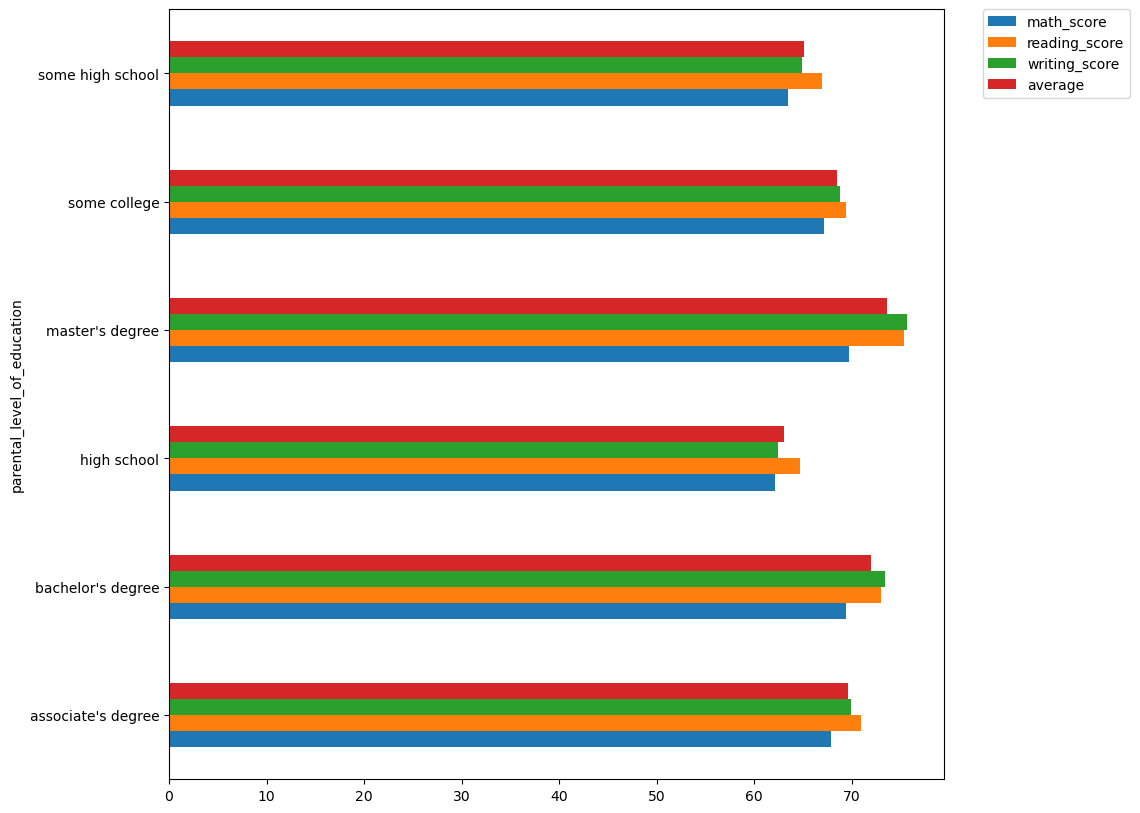

In [41]:
Group_data3_1.plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

### Insights

- The score of student whose parents possess master and bachelor level education are higher than others.

### 4.4.4 LUNCH COLUMN

- Which type of lunch is mosr common among students?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS (Which type of lunch is most common among students?)

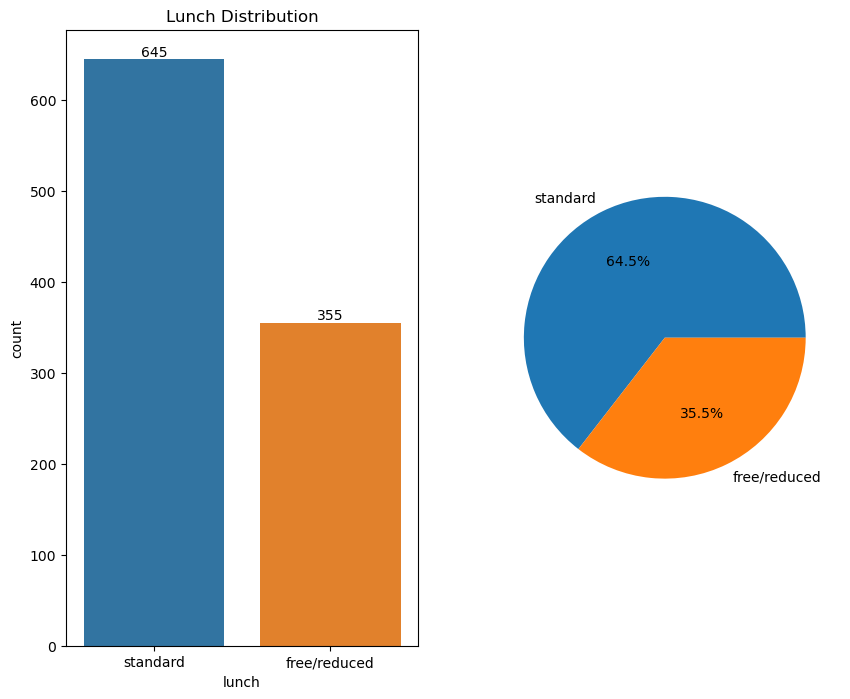

In [42]:
f, ax = plt.subplots(1,2,figsize = (10,8))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'lunch', ax = ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size =10)
ax[0].set_title('Lunch Distribution')

plt.subplot(1,2,2)
plt.pie(x = df['lunch'].value_counts(), labels = df['lunch'].value_counts().index, autopct = '%1.1f%%')


plt.show()

### Insights

- Students being served Standard lunch was more than free lunch.

## BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

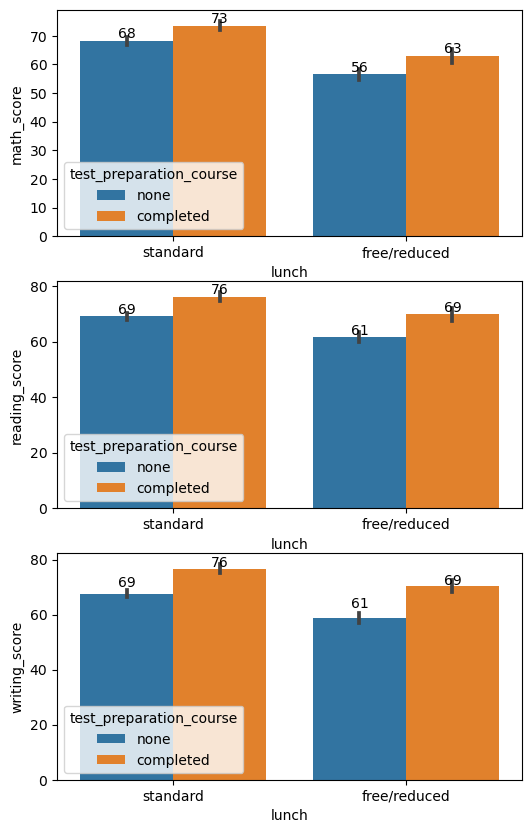

In [43]:
f,ax = plt.subplots(3,1,figsize=(6,10))
plt.subplot(3,1,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'], ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size =10,fmt = '%d')
    
plt.subplot(3,1,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'], ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size =10,fmt = '%d')
    
plt.subplot(3,1,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'], ax = ax[2])
for container in ax[1].containers:
    ax[2].bar_label(container, color = 'black', size =10,fmt = '%d')
plt.show()

### Insights

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.

## 4.4.5 TEST PREPARATION COURSE COLUMN

- Is Test prepration course has any impact on student's performance ?

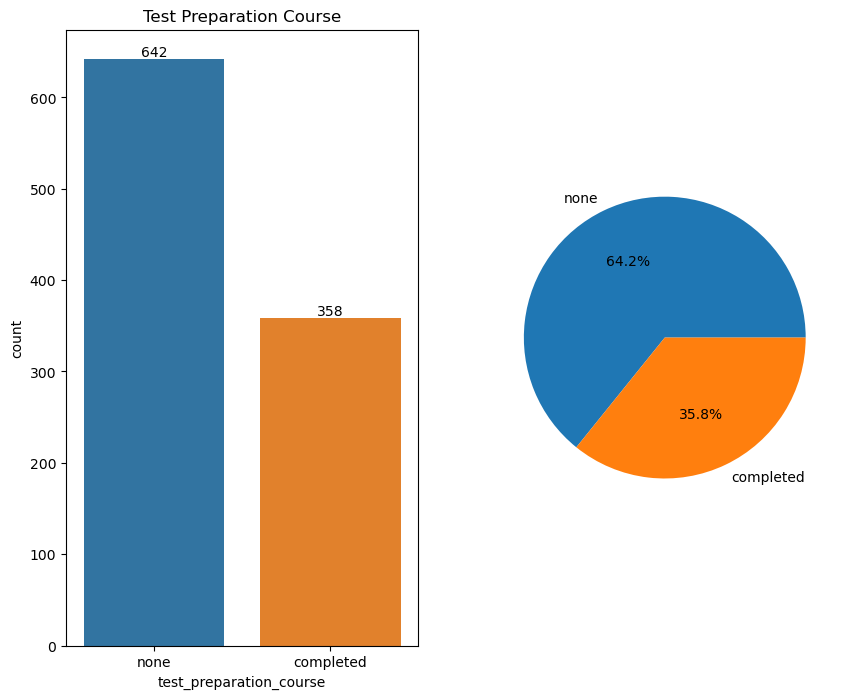

In [44]:
f, ax = plt.subplots(1,2,figsize = (10,8))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'test_preparation_course', ax = ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size =10)
ax[0].set_title('Test Preparation Course')

plt.subplot(1,2,2)
plt.pie(x = df['test_preparation_course'].value_counts(), labels = df['test_preparation_course'].value_counts().index, autopct = '%1.1f%%')


plt.show()

### Insights

- 64 percentage of students did not perform preparation course.

## BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [45]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [46]:
Group_data4 = df.set_index('test_preparation_course').groupby(level=0)[['math_score','reading_score','writing_score','average']].agg('mean')

In [47]:
Group_data4

,math_score,reading_score,writing_score,average
test_preparation_course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


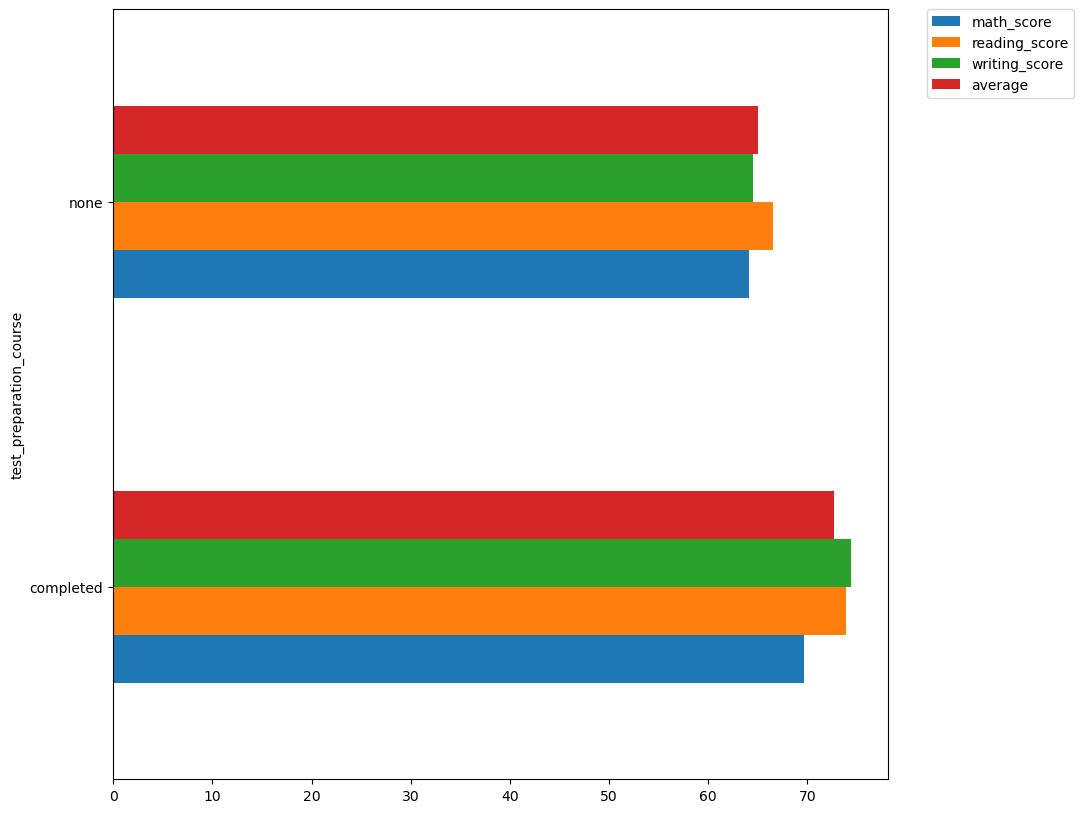

In [48]:
Group_data4.plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

### Insights

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

### 4.4.6 CHECKING OUTLIERS

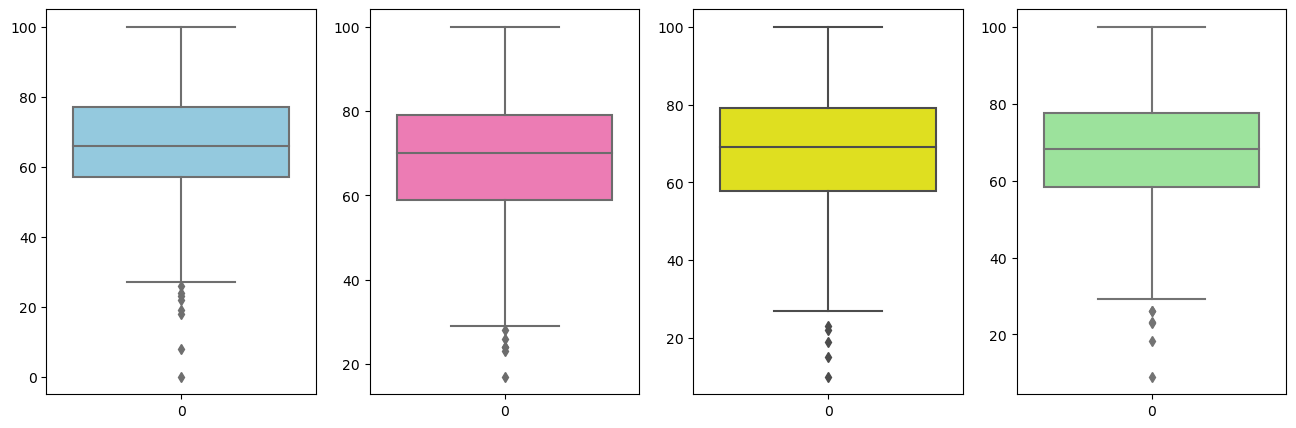

In [49]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

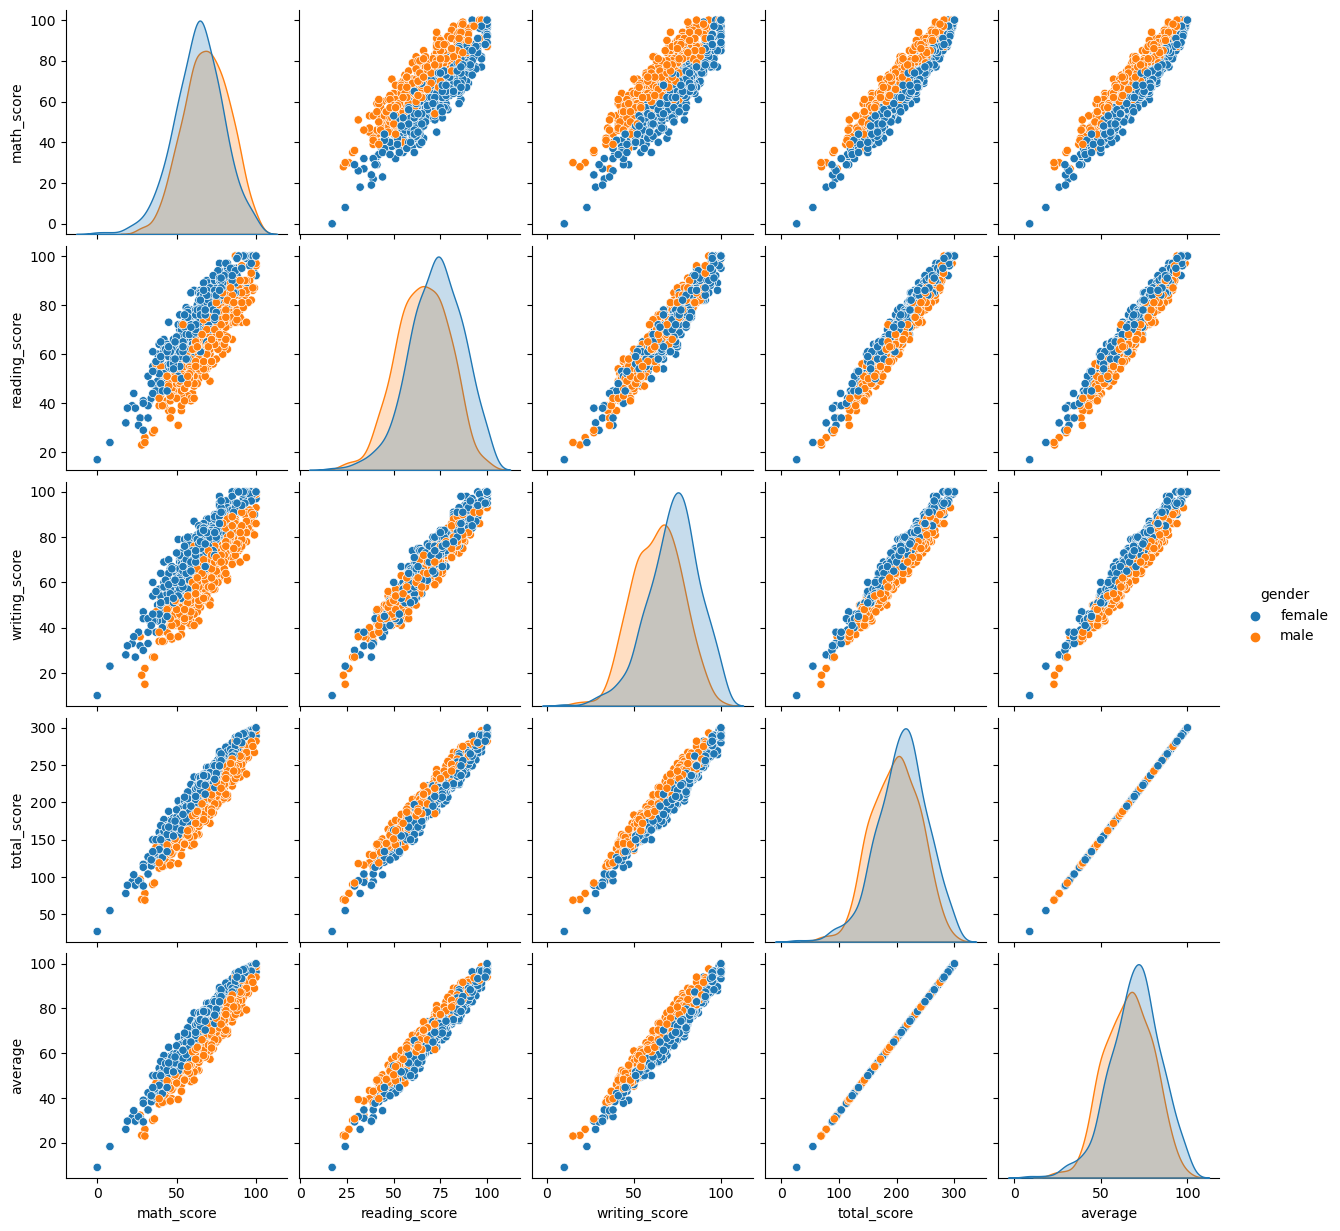

In [50]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights

- From the above plot it is clear that all the scores increase linearly with each other.

## Conclusions

- Student's Performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Student's Performance is not much related with test preparation course.
- Finishing preparation course is benefitial.